## Esame di Metodi Numerici

21 Luglio 2023

# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione, **Punti 1**
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 6**
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini della velocità di convergenza  dei due metodi alla soluzione, richiamando il risultato teorico visto a lezione.**Punti 2**

 - Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1. Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati **Punti 2**
  
  **Totale: Punti 11**


In [107]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

La matrice ha dimensioni 300x300
matrice A simmetrica
matrice A definita positiva
matrice sparsa


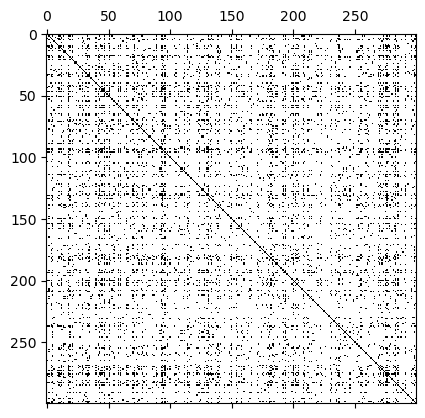

In [108]:
# Osservo com'è la matrice
m, n = A.shape
print(f'La matrice ha dimensioni {m}x{n}') 
if np.all(A == A.T): 
    print(f'matrice A simmetrica')
    if np.all(npl.eigvals(A) > 0): 
        print(f'matrice A definita positiva')
    else: print(f'matrice A non definita positiva')
else: print(f'matrice A non simmetrica')

if (np.count_nonzero(A)* 100) / (m*n) < 33: 
    print('matrice sparsa')
else: print ('matrice densa')

plt.spy(A)
 

In [109]:
# la matrice è quadrata => metodi diretti o iterativi 
# è sparsa e di grandi dimensioni => metodi iterativi
# simmetrica e def positiva => metodi di discesa: tra i due, scelgo il gradiente coniugato (converge alla soluzione)
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    x = x0

    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
    while errore >= tol and it< itmax:
        it =it+1
        Ap = A@p       
        alpha = -(r.T @ p) / (p.T @ Ap)       
        x = x + alpha * p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r  
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
        
    x = x0    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)

    while errore >= tol and it< itmax:
        it=it+1
        Ap = A@p
        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma = (r.T @ r) / rtr_old  
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = r + gamma * p   
    
    return x,vet_r,vec_sol,it

In [110]:
itmax = 2000
tol = 1e-6
x0 = np.array([0]*n).T

x_conj, vet_r_conj, vec_sol_conj, it_conj = conjugate_gradient(A, b, x0, itmax, tol)
x_st, vet_r_st, vec_sol_st, it_st = steepestdescent(A, b, x0, itmax, tol)
print(f'soluzione x = {x_st} con metodo Steepest descent in {it_st} iterazioni')
print(f'soluzione x = {x_conj} con metodo del Gradiente coniugato in {it_conj} iterazioni')

soluzione x = [[0.99928979 0.99928979 0.99928979 ... 0.99928979 0.99928979 0.99928979]
 [1.01964087 1.01964087 1.01964087 ... 1.01964087 1.01964087 1.01964087]
 [0.29211244 0.29211244 0.29211244 ... 0.29211244 0.29211244 0.29211244]
 ...
 [0.26795523 0.26795523 0.26795523 ... 0.26795523 0.26795523 0.26795523]
 [1.14683846 1.14683846 1.14683846 ... 1.14683846 1.14683846 1.14683846]
 [0.80677688 0.80677688 0.80677688 ... 0.80677688 0.80677688 0.80677688]] con metodo Steepest descent in 2000 iterazioni
soluzione x = [[ 7.20927289e+36  7.20927289e+36  7.20927289e+36 ...  4.15036969e+18
   4.15036969e+18 -8.20333487e+52]
 [-8.36099718e+35 -8.36099718e+35 -8.36099718e+35 ... -1.46492351e+18
  -1.46492351e+18  7.24604884e+52]
 [-4.84794358e+36 -4.84794358e+36 -4.84794358e+36 ... -4.41877808e+17
  -4.41877808e+17  1.12647678e+52]
 ...
 [-1.57107291e+19 -1.57107291e+19 -1.57107291e+19 ... -2.82651649e+16
  -2.82651649e+16  3.22344348e+31]
 [ 9.14949035e+18  9.14949035e+18  9.14949035e+18 ...  1

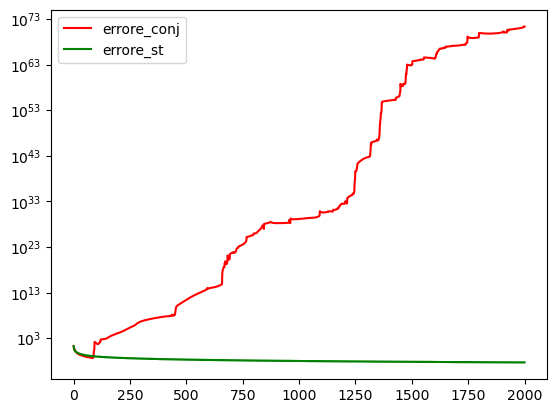

In [111]:
# visualizzare in scala logaritmica l'errore con le iterazioni
plt.semilogy(vet_r_conj, '-r', vet_r_st, '-g')
plt.legend(['errore_conj', 'errore_st'])
plt.show()

In [112]:
""" 
Verificare se la matrice è malcondizionata, 
dire teoricamente cosa questo implica in termini della velocità di convergenza dei due metodi alla soluzione,
richiamando il risultato teorico visto a lezione.
""" 
if npl.cond(A) < 100: 
    print("matrice A ben condizionata")
elif 100 < npl.cond(A) < 10**4: print("matrice mediamente mal condizionata")
else: print("matrice mal condizionata")

matrice mal condizionata


La matrice è mal condizionata: in generale, il metodo Conjugate Gradient è più veloce dello Steepest Descent. Tuttavia, se la matrice è molto mal condizionata, può succedere che siano necessarie molte iterazioni per ottenere la convergenza.

In [113]:
""" 
Costruire la matrice A1, ottenuta a partire da A, 
sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, 
e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 = b1 
sia il vettore formato da tutti 1. 
Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. 
Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati
"""
A1 = A + 0.05 * np.eye(n)
x1 = np.ones((n, 1))
b1 = A1 @ x1

x1_conj, vet1_r_conj, vec1_sol_conj, it1_conj = conjugate_gradient(A1, b1, x0, itmax, tol)
x1_st, vet1_r_st, vec1_sol_st, it1_st = steepestdescent(A1, b1, x0, itmax, tol)
print(f'soluzione x1 = {x1_st} con metodo Steepest descent in {it1_st} iterazioni')
print(f'soluzione x1 = {x1_conj} con metodo del Gradiente coniugato in {it1_conj} iterazioni')


soluzione x1 = [[0.99999984 0.99999984 0.99999984 ... 0.99999984 0.99999984 0.99999984]
 [1.00000002 1.00000002 1.00000002 ... 1.00000002 1.00000002 1.00000002]
 [0.99999955 0.99999955 0.99999955 ... 0.99999955 0.99999955 0.99999955]
 ...
 [0.99999961 0.99999961 0.99999961 ... 0.99999961 0.99999961 0.99999961]
 [1.00000005 1.00000005 1.00000005 ... 1.00000005 1.00000005 1.00000005]
 [0.9999999  0.9999999  0.9999999  ... 0.9999999  0.9999999  0.9999999 ]] con metodo Steepest descent in 156 iterazioni
soluzione x1 = [[1.00000003 1.00000003 1.00000003 ... 1.00000003 1.00000003 1.00000003]
 [1.00000002 1.00000002 1.00000002 ... 1.00000002 1.00000002 1.00000002]
 [0.99999999 0.99999999 0.99999999 ... 0.99999999 0.99999999 0.99999999]
 ...
 [0.99999999 0.99999999 0.99999999 ... 0.99999999 0.99999999 0.99999999]
 [1.00000001 1.00000001 1.00000001 ... 1.00000001 1.00000001 1.00000001]
 [0.99999996 0.99999996 0.99999996 ... 0.99999996 0.99999996 0.99999996]] con metodo del Gradiente coniugato i

In [114]:
if npl.cond(A1) < 100: 
    print(f'matrice A1 ben condizionata')
elif 100 < npl.cond(A1) < 10**4:
    print("matrice A1 mediamente mal condizionata")
else:  print("matrice A1 altamente mal condizionata")

matrice A1 ben condizionata


La matrice A1 è ben condizionata. Infatti, il metodo del gradiente coniugato converge alla soluzione con meno iterazioni rispetto al metodo steepest descent.

# Esercizio 2

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=5, \quad x_3=0, \quad x_4=6\\
y_1=0, \quad y_2=0, \quad y_3=5, \quad y_4=7.
\end{array}
$$ 
contenenti rispettivamente le ascisse e le ordinate di 11 punti del piano.

**Suggerimento:**
Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


1. Si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;  **5 punti**

In [115]:
import numpy as np
import numpy.linalg as npl
import simulazione_6.SolveTriangular as SolveTriangular
import matplotlib.pyplot as plt

In [116]:
A = np.array(( [0, 5, 0, 6], 
    [0, 0, 5, 7],
    [1, 1, 1, 1] )).T

b_vet = np.array(([0, 25, 25, 85]))
b = b_vet.reshape(-1, 1)

2. Si sfrutti il metodo più opportuno per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$;  **5 punti**


In [117]:
# minimi quadrati, qrLS, SVDLS
# se non è a rango massimo ed è mal condizionata => SVDLS
# se è a rango massimo, controllo il condizionamento: se ben condizionata, minimi quadrati. Se mal condizionata, qrLS

if npl.cond(A) < 100: 
    print("A ben condizionata")
# uso minimi quadrati

A ben condizionata


In [118]:
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G = A.T @ A     
    f = A.T @ b    
    L = npl.cholesky(G)
    U = L.T  
    z, flag = SolveTriangular.Lsolve(L, f)
    if flag == 0:
        x, flag = SolveTriangular.Usolve(U, z)
    
    return x   

In [119]:
a = eqnorm(A, b)
print(f'soluzione a* del sistema Ax=b è {a}')

soluzione a* del sistema Ax=b è [[ 6.6091954 ]
 [ 6.72413793]
 [-4.59770115]]


3. Si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$ e, dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema. **4 punti**


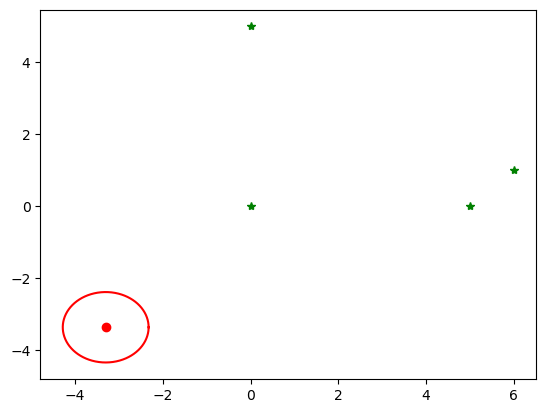

In [120]:
res = npl.norm(a, 2)
centro = (-a[0] / 2, -a[1] / 2)
raggio = np.sqrt(( (centro[0]**2) / 4 + (centro[1]**2) / 4 + a[2]))

x_iniziali = np.array(( [0, 0, 5, 6] ))
y_iniziali = np.array(( [0, 5, 0, 1] ))

# Intervallo [0, 2π]
t = np.linspace(0, 2 * np.pi, 1000)
xt = centro[0] + raggio * np.cos(t)
yt = centro[1] + raggio * np.sin(t)
 
plt.plot(centro[0], centro[1], 'ro', x_iniziali, y_iniziali, 'g*', xt, yt, 'r-')
plt.axis = "equal"

## Domanda intelligenza artificiale

- Allenamento di una rete neurale: dopo aver descritto come è composta una rete neurale, descrivi in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**
- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**